In [13]:
import os
import pandas as pd

directory = r"C:\Users\rachitgandhi1\OneDrive - KPMG\Desktop\Data"
#input('Please enter the folder directory path :')  # Replace with the actual directory path
#year_repo = input('Please enter the year :')

# List all files in the directory
files = os.listdir(directory)

turbine1_df = pd.DataFrame()
turbine2_df = pd.DataFrame()
turbine3_df = pd.DataFrame()
turbine4_df = pd.DataFrame()
turbine5_df = pd.DataFrame()
turbine6_df = pd.DataFrame()

turbines = [turbine1_df, turbine2_df, turbine3_df,turbine4_df, turbine5_df, turbine6_df ]


csv_1_files = [file for file in files if file.endswith('.csv') and file.startswith('Turbine_Data_Kelmarsh_1')]
csv_2_files = [file for file in files if file.endswith('.csv') and file.startswith('Turbine_Data_Kelmarsh_2')]
csv_3_files = [file for file in files if file.endswith('.csv') and file.startswith('Turbine_Data_Kelmarsh_3')]
csv_4_files = [file for file in files if file.endswith('.csv') and file.startswith('Turbine_Data_Kelmarsh_4')]
csv_5_files = [file for file in files if file.endswith('.csv') and file.startswith('Turbine_Data_Kelmarsh_5')]
csv_6_files = [file for file in files if file.endswith('.csv') and file.startswith('Turbine_Data_Kelmarsh_6')]

csv_i_files  = [csv_1_files,csv_2_files,csv_3_files,csv_4_files,csv_5_files,csv_6_files]


In [14]:
turbine1_df = pd.DataFrame()
for csv_1_file in csv_1_files:
    path = r'C:\Users\rachitgandhi1\OneDrive - KPMG\Desktop\Data'
    df = pd.read_csv(f'{path}\{csv_1_file}',skiprows=8, header=1)
    print(df.size)
    turbine1_df = pd.concat([turbine1_df,df], axis=0)
    print(turbine1_df.size)
    

15715440
15715440
15758496
31473936
7793136
39267072


In [15]:
import data_preprocess as dpf
turbine1_df_fi = dpf.data_process(turbine1_df)

turbine1_df_final = dpf.normalize_all(turbine1_df_fi)

In [16]:
# calculate the median of each column over the last 14 days, ignoring NaN values
# Assuming 'df' is your DataFrame
turbine1_df_final = turbine1_df_final.dropna(subset=['Wind speed (m/s)'])
# Assuming 'df' is your DataFrame and the columns are ['column1', 'column2', 'column3']

turbine1_df_final['Metal particle count counter'].fillna(method='ffill', inplace=True)
turbine1_df_final['Tower Acceleration y (mm/ss)'].fillna(method='ffill', inplace=True)
turbine1_df_final['Tower Acceleration X (mm/ss)'].fillna(method='ffill', inplace=True)
turbine1_df_final['blade_angle'].fillna(method='ffill', inplace=True)
turbine1_df_final['Front bearing temperature (°C)'].fillna(method='ffill', inplace=True)
turbine1_df_final['Rear bearing temperature (°C)'].fillna(method='ffill', inplace=True)
turbine1_df_final['Nacelle ambient temperature (°C)'].fillna(method='ffill', inplace=True)

for i in (1,50):
    means = turbine1_df_final.rolling(window=7, min_periods=1).mean(numeric_only=True)

    # replace NaN values in each column with the corresponding median value, or 0 if there are no non-NaN values
    turbine1_df_final = turbine1_df_final.fillna(means)
    

C:\Users\rachitgandhi1\AppData\Local\Temp\ipykernel_12648\1804872737.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turbine1_df_final['Metal particle count counter'].fillna(method='ffill', inplace=True)
C:\Users\rachitgandhi1\AppData\Local\Temp\ipykernel_12648\1804872737.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turbine1_df_final['Tower Acceleration y (mm/ss)'].fillna(method='ffill', inplace=True)
C:\Users\rachitgandhi1\AppData\Local\Temp\ipykernel_12648\1804872737.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

In [17]:

from darts import TimeSeries
from darts.utils.timeseries_generation import linear_timeseries

frequency = '10min'

# Assuming you have a pandas DataFrame with a column named 'timestamp' and a column named 'power'
# and you want to split the data into 80% training and 20% testing

# Convert your data to a Darts TimeSeries object
series = TimeSeries.from_dataframe(turbine1_df, '# Date and time', 'Power (kW)', freq=frequency)

# Split the time series into training and testing sets
train_size = int(len(series) * 0.67)  # 67% of the data for training
train, test = series[:train_size], series[train_size:]

# Print the lengths of the train and test sets
print("Train length:", len(train))
print("Test length:", len(test))



Train length: 87989
Test length: 43339


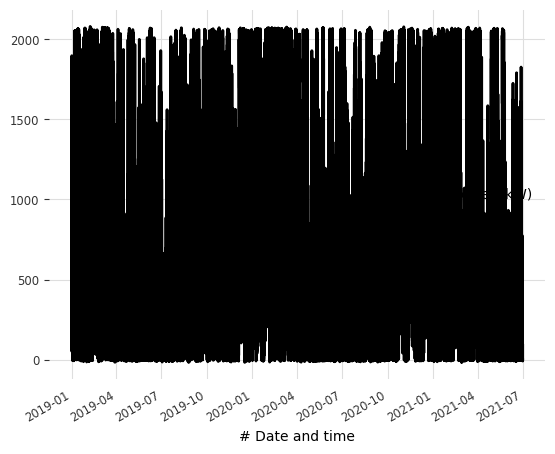

In [18]:
series.plot()